In [62]:
datasetsNames = {1:"3M"}
datasetNumber = 1

In [63]:
%run classes/Shapefile.ipynb
%run classes/GraphConstruction.ipynb
inputFolder = "6-FinallRep"
outputFolder = "Json"

In [64]:
shp = Shapefile(datasetNumber, inputFolder, outputFolder)

In [65]:
graphConstruction = GraphConstruction(shp, inputFolder, outputFolder)

In [66]:
graphConstruction.construct(AllPipes = True, idPipe = 24329, insertBuffer = False)

The shapefile Data SIG/200213_3M_data/6-FinallRep/Pipes.shp is opned
The shapefile Data SIG/200213_3M_data/6-FinallRep/Nodes.shp is opned
The shapefile Data SIG/Buffer.shp is opned


True

In [14]:
import networkx as nx
import json

def create_gexf(json_data, output_file):
    # Create a directed graph
    graph = nx.DiGraph()

    # Iterate over each feature in the JSON data
    for feature in json_data:
        source_node = int(feature['properties']['sourceNode'])
        target_node = int(feature['properties']['targetNode'])

        # Add nodes and edge to the graph
        graph.add_node(source_node)
        graph.add_node(target_node)
        graph.add_edge(source_node, target_node)

    # Export the graph to a GEXF file
    nx.write_gexf(graph, output_file)

if __name__ == "__main__":
    # Load JSON data from file
    with open('Data SIG/3M/Json/Pipes.json') as json_file:
        json_data = json.load(json_file)

    # Specify the output GEXF file
    output_file = 'output.gexf'

    # Create GEXF file
    create_gexf(json_data, output_file)

    print(f'GEXF file "{output_file}" has been created.')

GEXF file "output.gexf" has been created.


In [6]:
graphConstruction.save_nodes_in_json()

KeyError: 'Manholes'

In [ ]:
graphConstruction.save_edges_in_json()

In [87]:
%run classes/GraphTools.ipynb

In [88]:
graphTools = GraphTools(graphConstruction)

In [89]:
print("ShapeFile :")
shp.describe_shapefiles()
print("Graph :")
graphTools.describe_graph()

ShapeFile :
The total number of edges is : 47044
The total number of nodes is : 46897
+----------------+-------+
|   Node Type    | Count |
+----------------+-------+
|    Fittings    |  427  |
|    Manholes    | 45410 |
|     Pumps      |  245  |
|   Structures   |  801  |
| TreatmentPlant |   14  |
+----------------+-------+
Graph :
The total number of edges is : 47599
The total number of nodes is : 47085
+----------------+-------+
|   Node Type    | Count |
+----------------+-------+
|    Manholes    | 45409 |
|     Pumps      |  245  |
|   Structures   |  801  |
|    Fittings    |  427  |
|     Dummy      |  189  |
| TreatmentPlant |   14  |
+----------------+-------+


In [98]:
graphTools.get_sub_graphs()

+--------------------+-------------------+-------------------+
|   Component Number |   Number of Nodes |   Number of Edges |
+====================+===================+===================+
|                  1 |               997 |              1002 |
+--------------------+-------------------+-------------------+
|                  2 |                 2 |                 1 |
+--------------------+-------------------+-------------------+
|                  3 |             33518 |             34053 |
+--------------------+-------------------+-------------------+
|                  4 |               141 |               140 |
+--------------------+-------------------+-------------------+
|                  5 |               412 |               418 |
+--------------------+-------------------+-------------------+
|                  6 |               971 |               974 |
+--------------------+-------------------+-------------------+
|                  7 |                98 |             

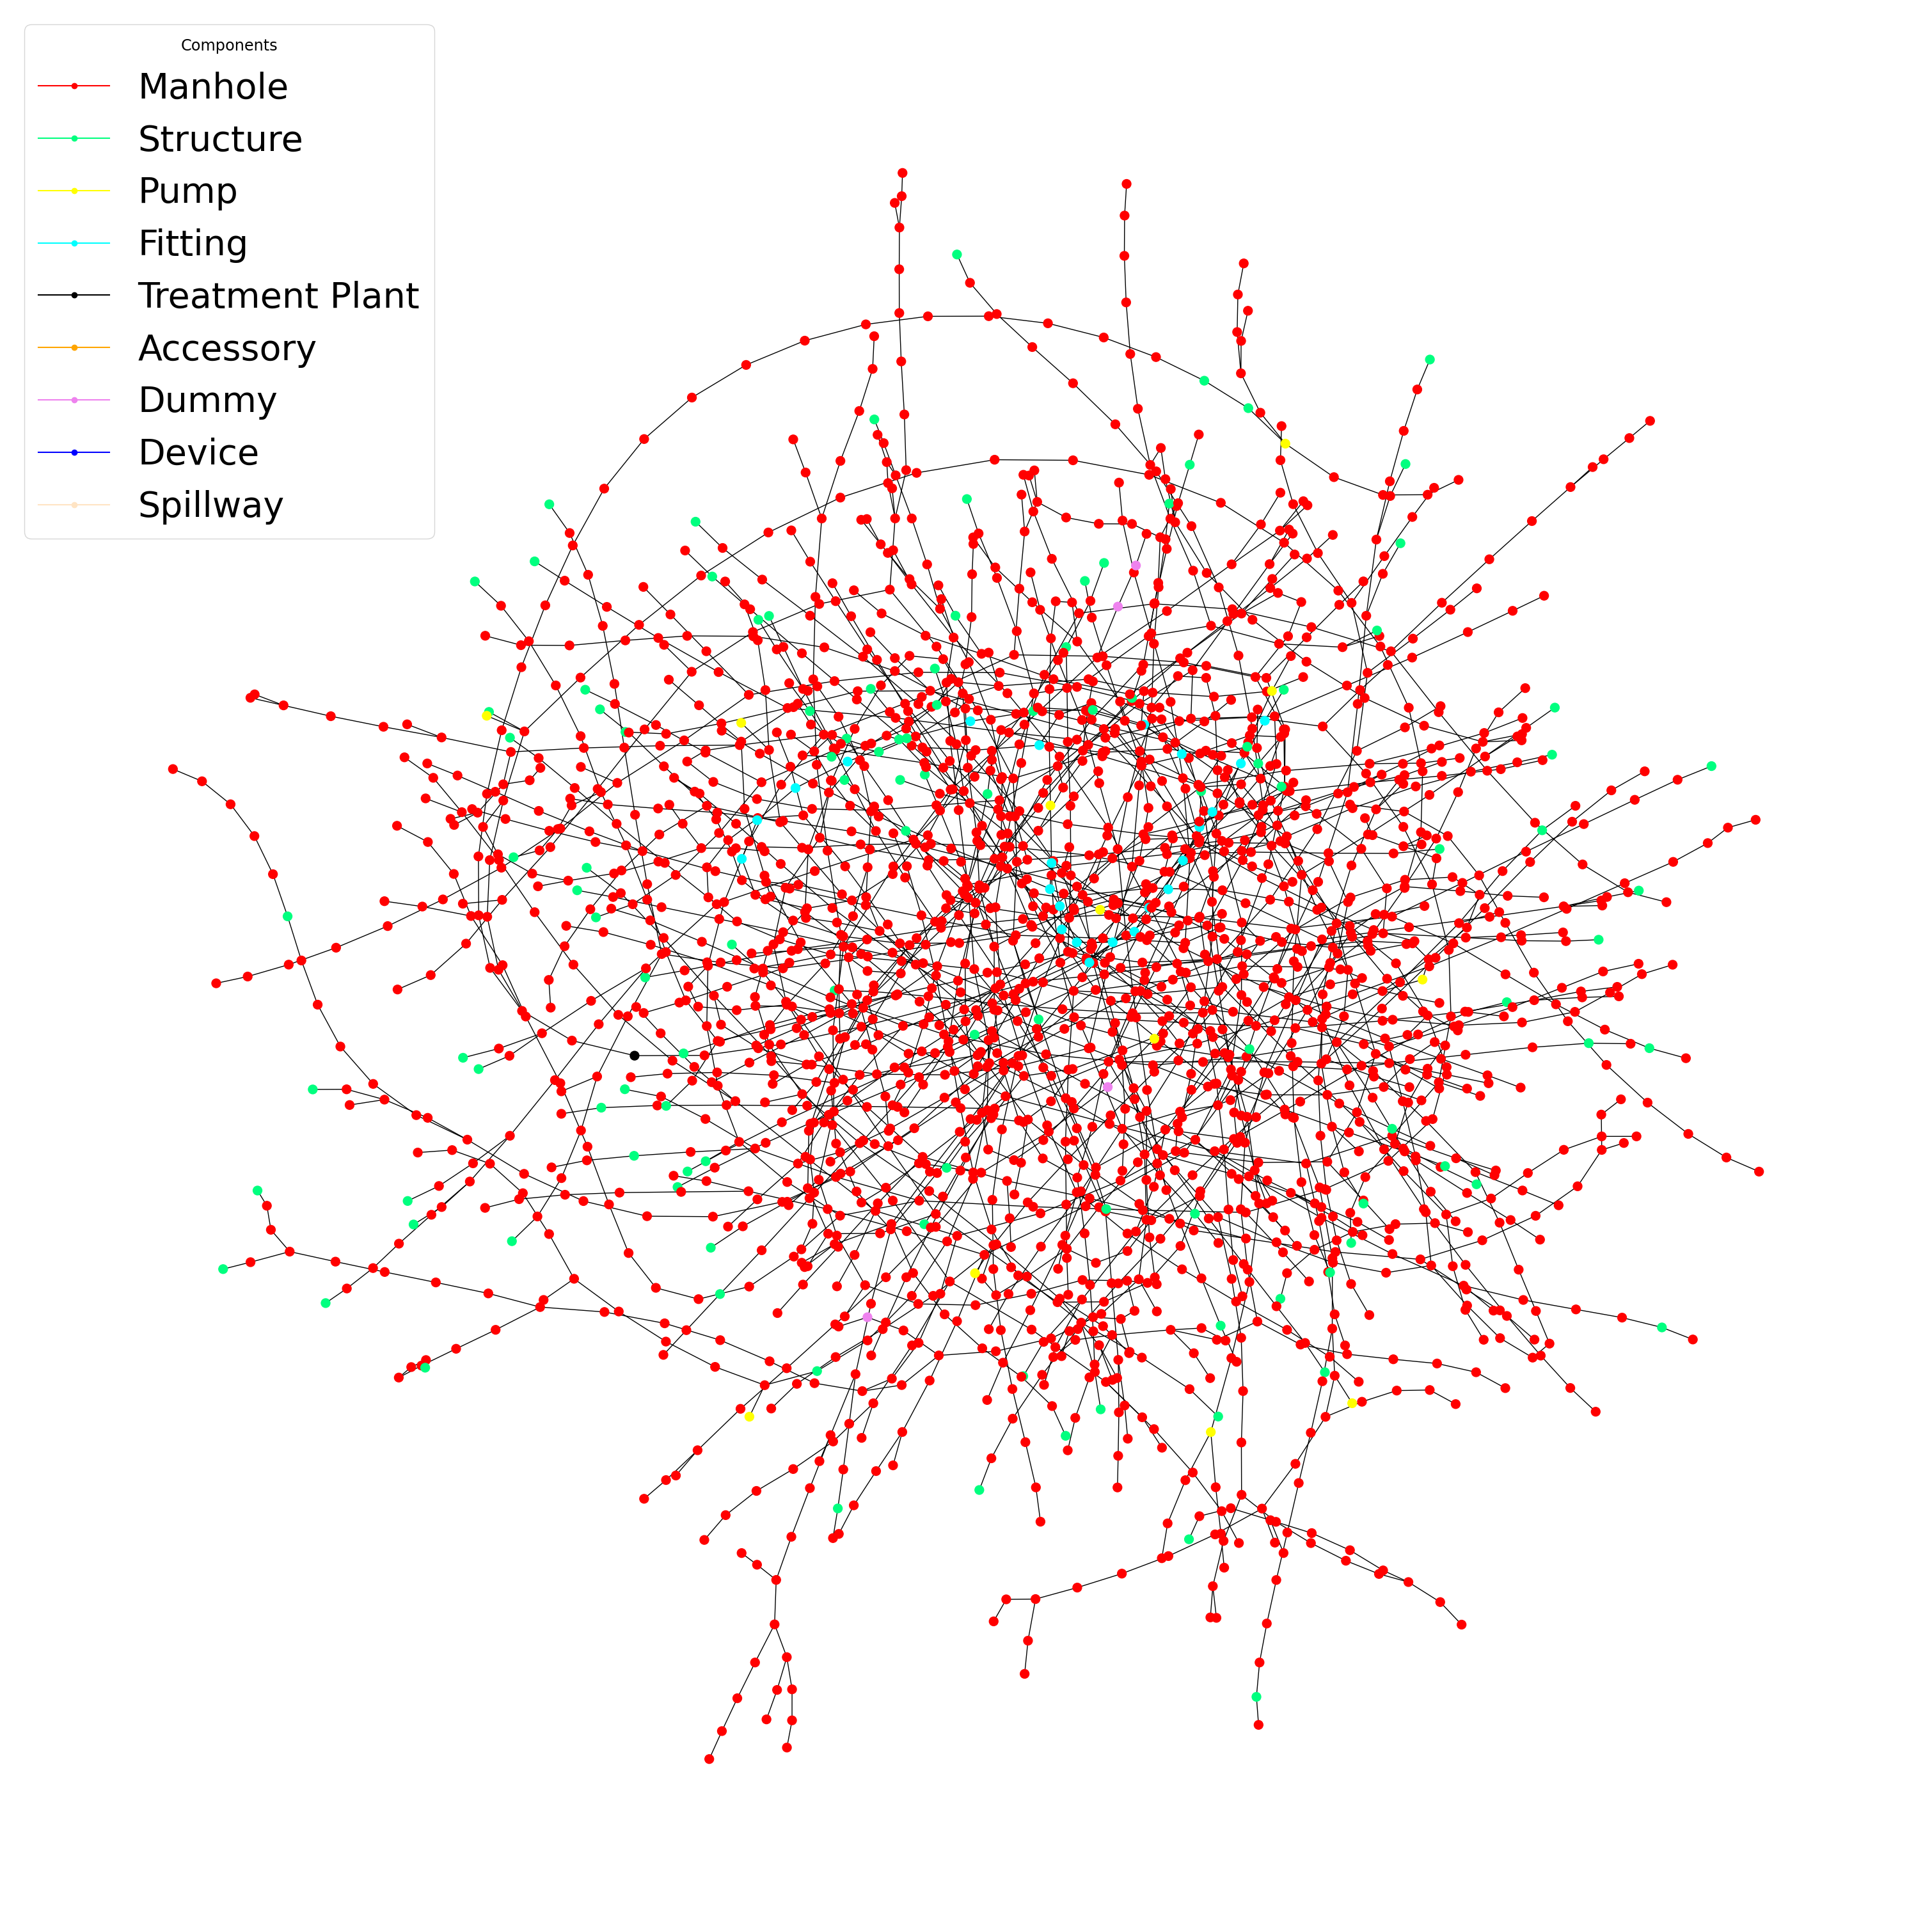

In [102]:
%run classes/GraphTools.ipynb
graphTools = GraphTools(graphConstruction)
graphTools.plot_sub_graph_by_id(24, labeled = False)

In [71]:
shp.get_connected_components_pipes()

476

In [41]:
datasetsNames = {1:"1402", 2:"200213_3M_data", 3:"1704/M3M", 4:"200211_Veolia_M3M", 5:"3M",  5:"3MNEW"}
datasetNumber = 5
%run classes/Shapefile.ipynb
%run classes/GraphConstruction.ipynb
inputFolder = "6-FinallRep"
outputFolder = "Json"
shp = Shapefile(datasetNumber, inputFolder, outputFolder)

In [42]:
shp.read_shapefile('Nodes')
shp.read_shapefile('Pipes')

The shapefile Data SIG/3M/6-FinallRep/Nodes.shp is opned
The shapefile Data SIG/3M/6-FinallRep/Pipes.shp is opned


In [43]:
print("ShapeFile :")
shp.describe_shapefiles()

ShapeFile :
The total number of edges is : 51295
The total number of nodes is : 54599
+------------------+-------+
|    Node Type     | Count |
+------------------+-------+
|     Appariel     |  3808 |
|    Deversoir     |   75  |
|     Manholes     | 49987 |
| PosteRefoulement |  285  |
|    Structures    |  431  |
|  TreatmentPlant  |   13  |
+------------------+-------+
